# DATA WRANGLING PROJECT 

## House Rental
This notebook consists of the wrangling involved in `House Rental`

The steps are as follows:
 1. Loading and renaming the dataset
 2. Aggregating the columns
 3. Reshaping the dataframe into common structure
 4. Export into csv

In [1]:
#Loading the required libraries:
library (tidyverse)
library(lubridate)
library(ggplot2)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.2.1     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date




### Loading and Renaming the dataset

In [2]:
#Reading CSV file into dataframe

base_csv <- read_csv( "ta-mean-rents.csv",
                col_types = cols(Month = col_date() #converting the field into date datatype
                    )) 

#Since the values arre spreaded, we are using `gather()` below and renaming it
unclean_df <- base_csv %>% gather("NZ_City", "Rent", 2:74)
clean_df <- rename(unclean_df, Date = Month)

### Aggregating the columns

In [3]:
#function to create Year,Month,Quarter(ymq)
add_ymq <- function(df){
            df %>%
                mutate(Year = year(df$Date), 
                       Month = month(df$Date),
                       Quarter = zoo::as.yearqtr(df$Date, format = "%Y-%m-%d")) %>%      # converted to year, month and date format
                select(-c("Date")) %>% select(c(3,4,5,1,2))
    }

#function to calculate avg rent
add_avgrent <- function(df){
                df %>%
                    group_by(Year,Quarter,Month,NZ_City) %>%
                    summarise(Avg_rent = mean(Rent)) }

### Reshaping the dataframe into common structure
so that it can be used in the data model with the rest of the enities.

In [4]:
final <- clean_df %>% add_ymq()  %>% add_avgrent() %>% na.omit()

final <- final %>% select("Year","Month","Quarter","NZ_City","Avg_rent")

In [5]:
final %>% head()

Year,Month,Quarter,NZ_City,Avg_rent
<dbl>,<dbl>,<yearqtr>,<chr>,<dbl>
1993,1,1993 Q1,Ashburton District,112
1993,1,1993 Q1,Auckland,200
1993,1,1993 Q1,Buller District,92
1993,1,1993 Q1,Carterton District,92
1993,1,1993 Q1,Central Otago District,98
1993,1,1993 Q1,Christchurch,152


### Export into csv

The below exported file is further used in `section -3 of 'IVS.pynb'` that has IVS data for further analysis.

In [6]:
write_csv(final,"Rental.csv")

### Visualization and Inferences

Lets make some visualization from the final data to analyze further

In [7]:
#creating a dataframe for plotting area chart
vis1_HR <- final %>% filter(Year >= 2014) %>% filter(NZ_City == "Christchurch" | NZ_City == "Auckland" | NZ_City == "Wellington" | NZ_City == "Queenstown-Lakes District") %>% 
                    select(Year,NZ_City,Avg_rent) %>% 
                    group_by(Year,NZ_City) %>% 
                    summarise(Avg_HouseRental = mean(Avg_rent))
vis1_HR

Adding missing grouping variables: `Quarter`, `Month`



Year,NZ_City,Avg_HouseRental
<dbl>,<chr>,<dbl>
2014,Auckland,476.0000
2014,Christchurch,414.3333
2014,Queenstown-Lakes District,403.3333
2014,Wellington,435.5000
2015,Auckland,506.4167
2015,Christchurch,400.5833
2015,Queenstown-Lakes District,441.8333
2015,Wellington,440.8333
2016,Auckland,528.9167


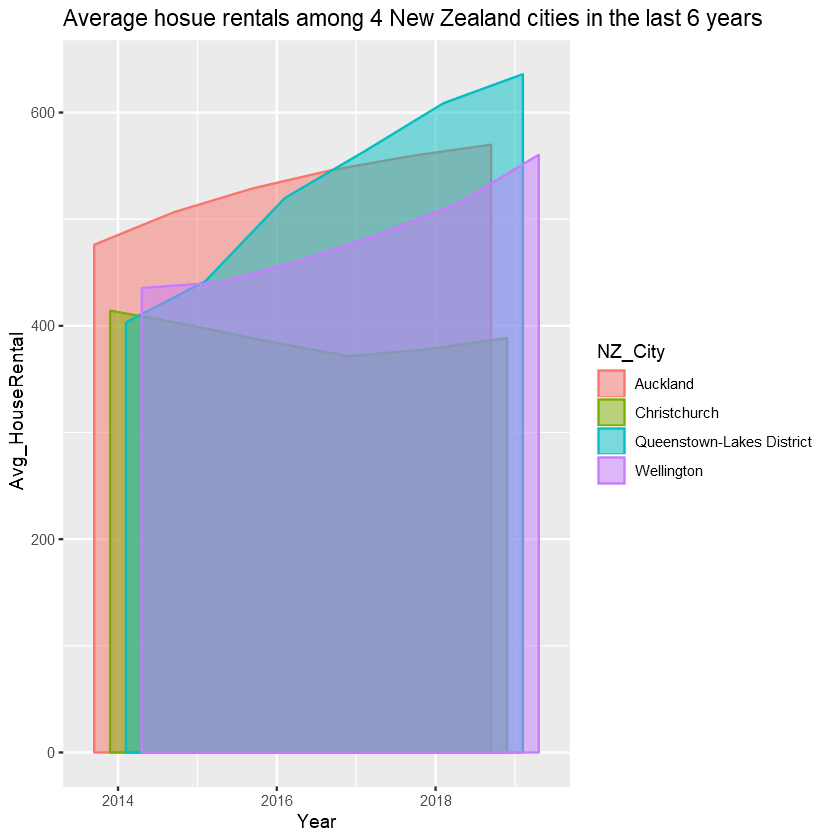

In [8]:
#A area chart that compares the average hosue rentals among 4 New Zealand cities in the last 6 years.

ggplot(vis1_HR, aes(x = Year, y = Avg_HouseRental)) + 
  geom_area(aes(color = NZ_City, fill = NZ_City), 
            alpha = 0.5, position = position_dodge(0.8)) +
  ggtitle("Average hosue rentals among 4 New Zealand cities in the last 6 years")

#### After executing this notebook, go to <b>`read_me.txt`</b> to execute the next notebook.

If you have `already executed` all the other notebooks, `then` go to `section -3 in 'IVS.pynb'` that has IVS data